In [8]:
import rnnSMAP
import numpy as np
import pandas as pd
import torch
import argparse

In [9]:
import imp
imp.reload(rnnSMAP)
rnnSMAP.reload()

opt = rnnSMAP.classLSTM.optLSTM(
    rootDB=rnnSMAP.kPath['DB_L3_NA'],
    rootOut=rnnSMAP.kPath['Out_L3_NA'],
    syr=2017, eyr=2017,
    var='varLst_Forcing', varC='varConstLst_Noah',
    train='CONUSv16f1', dr=0.5, modelOpt='relu',
    target='SMAP_AM',gpu=0, loss='mse'
)

load rnnSMAP


In [10]:
opt['model'] = 'torch'
opt['out'] = 'delta_model_3_lstm'
rnnSMAP.funLSTM.trainLSTM(opt)

out = opt['out']
rootOut = rnnSMAP.kPath['Out_L3_NA']
syr = 2015
eyr = 2016

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/APCP_FORA.csv 0.05627918243408203
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DLWRF_FORA.csv 0.027821063995361328
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DSWRF_FORA.csv 0.02204608917236328
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/TMP_2_FORA.csv 0.027227163314819336
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SPFH_2_FORA.csv 0.03861594200134277
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/VGRD_10_FORA.csv 0.026435136795043945
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/UGRD_10_FORA.csv 0.022555828094482422
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SMAP_AM.csv 0.018384933471679688
Epoch 1 Loss 0.477 time 7.61
Epoch 2 Loss 0.266 time 6.95
Epoch 3 Loss 0.263 time 6.99
Epoch 4 Loss 0

Epoch 240 Loss 0.161 time 7.13
Epoch 241 Loss 0.152 time 7.45
Epoch 242 Loss 0.159 time 6.97
Epoch 243 Loss 0.157 time 7.31
Epoch 244 Loss 0.175 time 8.96
Epoch 245 Loss 0.161 time 7.07
Epoch 246 Loss 0.165 time 7.09
Epoch 247 Loss 0.163 time 7.06
Epoch 248 Loss 0.170 time 7.00
Epoch 249 Loss 0.164 time 7.07
Epoch 250 Loss 0.165 time 6.91
Epoch 251 Loss 0.163 time 7.65
Epoch 252 Loss 0.156 time 7.59
Epoch 253 Loss 0.158 time 8.35
Epoch 254 Loss 0.148 time 9.37
Epoch 255 Loss 0.161 time 7.43
Epoch 256 Loss 0.163 time 7.23
Epoch 257 Loss 0.167 time 7.20
Epoch 258 Loss 0.149 time 6.98
Epoch 259 Loss 0.161 time 6.83
Epoch 260 Loss 0.167 time 7.03
Epoch 261 Loss 0.160 time 6.99
Epoch 262 Loss 0.169 time 6.93
Epoch 263 Loss 0.161 time 6.98
Epoch 264 Loss 0.172 time 6.95
Epoch 265 Loss 0.150 time 6.88
Epoch 266 Loss 0.159 time 7.28
Epoch 267 Loss 0.158 time 7.40
Epoch 268 Loss 0.158 time 7.39
Epoch 269 Loss 0.157 time 7.55
Epoch 270 Loss 0.170 time 7.12
Epoch 271 Loss 0.160 time 7.26
Epoch 27

KeyboardInterrupt: 

In [11]:
out = 'delta_model_3_lstm'
testName = 'CONUSv16f1'
rootDB = rnnSMAP.kPath['DB_L3_NA']
rootOut = rnnSMAP.kPath['Out_L3_NA']

In [12]:
ds1 = rnnSMAP.classDB.DatasetPost(rootDB=rootDB, subsetName=testName, yrLst=[2017])# define dataset
ds1.readData(var='SMAP_AM', field='SMAP')# read target
ds1.readPred(rootOut=rootOut, out=out, drMC=0, field='LSTM')# read prediction
statErr1 = ds1.statCalError(predField='LSTM', targetField='SMAP')# calculate error

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SMAP_AM.csv 0.04020404815673828
running test
/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/APCP_FORA.csv 0.0394291877746582
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DLWRF_FORA.csv 0.03603315353393555
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DSWRF_FORA.csv 0.026681184768676758
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/TMP_2_FORA.csv 0.01964592933654785
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SPFH_2_FORA.csv 0.030827999114990234
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/VGRD_10_FORA.csv 0.0291898250579834
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/UGRD_10_FORA.csv 0.030770063400268555


FileNotFoundError: [Errno 2] No such file or directory: '/Users/rajdesai/Desktop/Hydro/output/L3_NA/delta_model_3_lstm/ep500.pt'

In [5]:
ds2 = rnnSMAP.classDB.DatasetPost(rootDB=rootDB, subsetName=testName, yrLst=[2015, 2016])
ds2.readData(var='SMAP_AM', field='SMAP')
ds2.readPred(rootOut=rootOut, out=out, drMC=0, field='LSTM')
statErr2 = ds2.statCalError(predField='LSTM', targetField='SMAP')

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/SMAP_AM.csv 0.05273318290710449
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/SMAP_AM.csv 0.03051900863647461
running test
/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/APCP_FORA.csv 0.016087055206298828
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/APCP_FORA.csv 0.021341800689697266
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/DLWRF_FORA.csv 0.029649019241333008
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/DLWRF_FORA.csv 0.04226994514465332
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/DSWRF_FORA.csv 0.04418587684631348
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/DSWRF_FORA.csv 0.02840590476989746
read /Users/rajdesai/Desktop/H

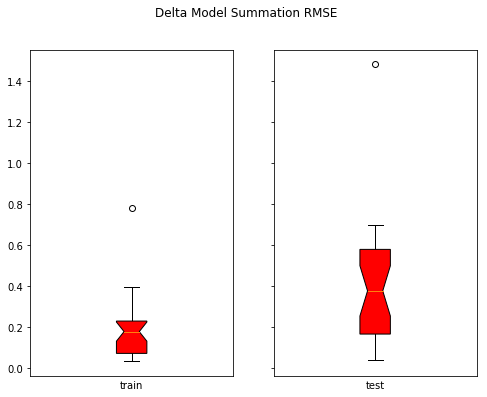

In [13]:
strE = 'RMSE'
dataErr = [getattr(statErr1, strE), getattr(statErr2, strE)]
fig = rnnSMAP.funPost.plotBox(dataErr, labelC=['train', 'test'], title='Delta Model Summation ' + strE)